# <span style="text-decoration:underline">Solution</span>

* I have used the Concept of **THRESHOLD** to crop the bacterial test strips from images

* I have used tool **OpenCv** in **Python** to write the code.

From the test images, we are able to find that we need to predict the change from
black/gray pixel to white/purple pixel. So here it is quite obvious that white and purple
will have huge amount of RED value compared to other colors. So i am trying to consider
RED value in a pixel as our main information to differentiate the strip in a image.

In [1]:
#importing necessary libraries
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#importing the image and storing it to img
img = cv2.imread('IMG_3142.JPG')

#storing the height and width of image in h,w
h,w = img.shape[:2]

Below array is to store the hight dimension value, when
there is change in color from black/gray to white/purple.
We try to fetch these points from every w/8th distance in width.

In [3]:
h_dim_top = [0]*7

# same as above variable, but this is to store when change from white/purple to black/gray
h_dim_bottom = [h]*7

Dividing the width into 8 equal parts and finding the threshold difference of 
only red colour of pixels by iterating from top to bottom along height, for each part. 

In [4]:
# This is to track the number of vertical lines used
i=-1
'''Considering this much gap between pixels to compute difference of RED value'''
pixel_gap = 10
'''we considering the value 10, as we tried different values and came to know
that 10 is the optimal good value to easily find the threshold of change in
color from grey to white or viceversa'''

for width in range(int(w/8),w,int(w/8)):
    # This variable to to find the max and min change in RED pixel value compared to other succeding RED pixel
    max_tresh = min_tresh = 0
    i = i+1
    for height in range(0, h-pixel_gap):
        red_pixel_dif = int(img[height+pixel_gap,width,2]) - int(img[height,width,2])
        if (red_pixel_dif > max_tresh):
            h_dim_top[i] = height
            max_tresh = red_pixel_dif
        elif (red_pixel_dif < min_tresh):
            h_dim_bottom[i]=height
            min_tresh = red_pixel_dif

* considering the max value of h_dim_top as starting row and min value of h_dim_bottom as ending row 
   to point out the crop image from original image to get only white part with __100%__ Accuracy
* If we exchange max and min in the cropping step,then we get the white part along with gray part.
* __So 2 cases can be obtained just by interchanging max and min in that step__
* 7 different columns in a image are selected to find the worst case to crop the image, so that we don't
   miss white strip part, considering white strips are not exactly horizantal in every image

In [5]:
cropped_img = img[max(h_dim_top):min(h_dim_bottom),0:w]

#Printing the maximum and minimum values of height of image cropped 
print("Height of image cropped: \nmin value:",max(h_dim_top),", max value:",min(h_dim_bottom))
cv2.imshow('cropped_img',cropped_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("cropped_img_3142.jpg",cropped_img)
h,w=cropped_img.shape[:2]
print("shape of cropped image:\n","height:",h,", width:",w)

Height of image cropped: 
min value: 1021 , max value: 1516
shape of cropped image:
 height: 495 , width: 3264


##  <span style="color:blue"> TEST CASES:</span>

## <span style="color:red">  Below are Sample Outputs Obtained after testing some Images:</span>

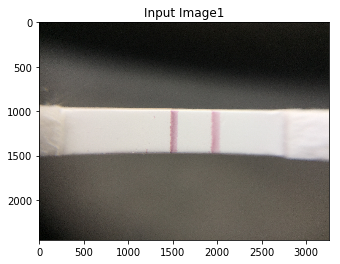

In [6]:
# Input image 1
img1=plt.imread("IMG_3086.JPG")
plt.title('Input Image1')
plt.imshow(img1)

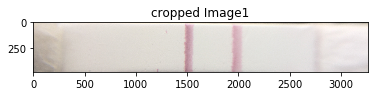

In [7]:
#Output of cropped image 1
img1_=plt.imread("cropped_img_3086.jpg")
plt.title('cropped Image1')
plt.imshow(img1_)

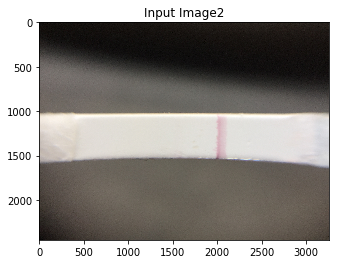

In [8]:
#Input image 2
img2=plt.imread("IMG_3142.JPG")
plt.title('Input Image2')
plt.imshow(img2)

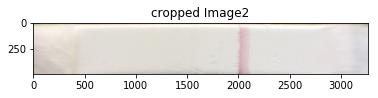

In [9]:
#Output of cropped image 2
img2_=plt.imread("cropped_img_3142.jpg")
plt.title('cropped Image2')
plt.imshow(img2_)

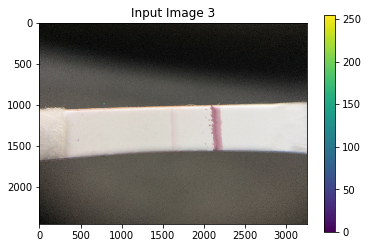

In [10]:
img3=plt.imread("IMG_3112.JPG")
plt.title('Input Image 3')
plt.imshow(img3)
plt.colorbar()

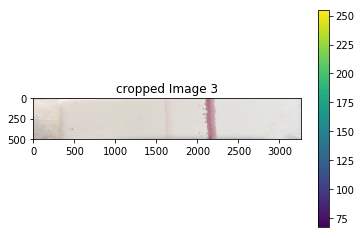

In [11]:
#Output of cropped image 2
img3_=plt.imread("cropped_img_3112.jpg")
plt.title('cropped Image 3')
plt.imshow(img3_)
plt.colorbar()

## Finally it is concluded to be having  <span style="color:blue">100% ACCURACY </span> after observing the output of all images

[Click here](https://drive.google.com/drive/folders/15oMf999CrO8qqQLx_VtvNfU1flOtDAD9) to go through the Output of all Cropped Images.

### REFERENCES USED:

* OpenCv tutorial    (docs.opencv.org)
* Matplotlib library (matplotlib.org)

                                                                                                            Submitted By     
#### <div style="text-align: right"> - AKHIL SAKETH PALEPU</div>                